# Heart Disease Analysis — Applied Data Science with Python

In [1]:
import os
os.getcwd()
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\Noor Saba\Dropbox\PC\Desktop\Data Science with Python


In [2]:
import os

print("Current Working Directory:", os.getcwd())
print("\nFiles in this folder:")
print(os.listdir())

print("\nDoes the dataset exist here?")
print("processed.cleveland.data" in os.listdir())

if "processed.cleveland.data" in os.listdir():
    print("File size (bytes):", os.path.getsize("processed.cleveland.data"))
    with open("processed.cleveland.data", "r", encoding="utf-8", errors="ignore") as f:
        first_line = f.readline()
    print("First line repr:", repr(first_line))


Current Working Directory: c:\Users\Noor Saba\Dropbox\PC\Desktop\Data Science with Python

Files in this folder:
['.github', 'AI and ML Bootcamp Exercise.docx', 'AI and ML Task Report.doc', 'AI and ML Task.ipynb', 'AIML Bootcamp exercise.ipynb', 'AI_ML_Bootcamp_Exercise.ipynb', 'analysis.ipynb', 'ask-detrano', 'Assignment - Python.ipynb', 'Assignment 1 - Python NOOR SABA.ipynb', 'assignment car manufacturing', 'bak', 'car_eval_dataset.csv', 'cleve.mod', 'cleveland.data', 'CLT - Central Limit Theorem - 1655007626359 - 1707067798924.ipynb', 'customers.csv', 'cust_seg - 1655553015951.csv', 'Data Merge Operations.xlsx', 'Demographic_Data(1).csv', 'Demographic_Data.csv', 'E-Commress data.csv', 'Expences Tracker.ipynb', 'Foundational structure for the expense tracker.ipynb', 'Groups & Bins, Aggregations and Joins python.ipynb', 'Heart Disease.ipynb', 'heart-disease.cost', 'heart-disease.delay', 'heart-disease.expense', 'heart-disease.group', 'heart-disease.names', 'heart-disease.README', 'hu

In [3]:
import pandas as pd

columns = [
    "age","sex","cp","trestbps","chol",
    "fbs","restecg","thalach","exang",
    "oldpeak","slope","ca","thal","target"
]

df_raw = pd.read_csv(
    "processed.cleveland.data",
    header=None,
    names=columns,
    sep=",",
    engine="python"
)

print("Raw shape:", df_raw.shape)
df_raw.head()


Raw shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3. Data Cleaning and Preprocessing

In [4]:
import numpy as np

df = df_raw.copy()

# Handle missing values
df = df.replace("?", np.nan)

# Convert all columns safely
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Drop rows with missing values
df = df.dropna().copy()

# Binarize target (0 = no disease, 1 = disease)
df["target"] = (df["target"] > 0).astype(int)

print("Final shape:", df.shape)
df["target"].value_counts()


Final shape: (297, 14)


target
0    160
1    137
Name: count, dtype: int64

# Hypothesis Testing (Heart Disease Analysis)
# Hypothesis 1: 
Patients with heart disease are older than those without

H₀ (Null): Mean age is the same for both groups
H₁ (Alternative): Mean age differs between groups

# Test: Independent two-sample t-test

In [5]:
from scipy.stats import ttest_ind

age_no = df[df["target"] == 0]["age"]
age_yes = df[df["target"] == 1]["age"]

t_stat, p_value = ttest_ind(age_no, age_yes, equal_var=False)

t_stat, p_value


(np.float64(-4.063563866474915), np.float64(6.203955636901932e-05))

# Interpretation (example wording):

The p-value < 0.05 indicates a statistically significant difference in age between patients with and without heart disease, suggesting age is an important risk factor.

# Hypothesis 2: Chest pain type is associated with heart disease

H₀: Chest pain type and heart disease are independent
H₁: Chest pain type and heart disease are associated

Test: Chi-square test of independence

In [6]:
from scipy.stats import chi2_contingency

cp_table = pd.crosstab(df["cp"], df["target"])
chi2, p, dof, expected = chi2_contingency(cp_table)

p


np.float64(1.1782838465918115e-16)

# Interpretation:

A significant chi-square result suggests chest pain type is strongly associated with heart disease presence.

# Hypothesis 3: Maximum heart rate achieved differs by disease status

H₀: Mean maximum heart rate is equal
H₁: Mean maximum heart rate differs

# Test: Independent t-test

In [7]:
thalach_no = df[df["target"] == 0]["thalach"]
thalach_yes = df[df["target"] == 1]["thalach"]

t_stat, p_value = ttest_ind(thalach_no, thalach_yes, equal_var=False)

p_value


np.float64(6.10793803360332e-14)

# Interpretation:

Patients with heart disease achieve significantly lower maximum heart rates during exercise.

# Hypothesis 4: Exercise-induced angina is associated with heart disease

H₀: Exercise-induced angina and heart disease are independent
H₁: They are associated

# Test: Chi-square test

In [8]:
exang_table = pd.crosstab(df["exang"], df["target"])
chi2, p, dof, expected = chi2_contingency(exang_table)

p


np.float64(9.510884265909016e-13)

# Interpretation:

Exercise-induced angina shows a statistically significant association with heart disease presence.

# Hypothesis 5: ST depression (oldpeak) is higher in patients with heart disease

H₀: Mean ST depression is equal
H₁: Mean ST depression differs

# Test: Mann–Whitney U (robust to non-normality)

In [9]:
from scipy.stats import mannwhitneyu

oldpeak_no = df[df["target"] == 0]["oldpeak"]
oldpeak_yes = df[df["target"] == 1]["oldpeak"]

u_stat, p_value = mannwhitneyu(oldpeak_no, oldpeak_yes, alternative="two-sided")

p_value


np.float64(1.5386103059956737e-12)

# Interpretation:

Higher ST depression values are significantly associated with heart disease, indicating ischemic changes during stress.

# Summary
Multiple statistical tests revealed significant associations between heart disease and age, chest pain type, exercise-induced angina, maximum heart rate, and ST depression. These results validate known clinical risk factors and informed subsequent predictive modeling.

# PART II — Predictive Modeling
1. Define Features and Target

In [10]:
X = df.drop("target", axis=1)
y = df["target"]


# 2. Train–Test Split

I split the data to evaluate how well the model generalizes to unseen patients.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


# 3. Feature Scaling (Required for Logistic Regression)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. Model 1. Logistic Regression (Baseline & Interpretability)
Train the model

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Evaluate performance

In [14]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score
)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8533333333333334
ROC-AUC: 0.9471428571428572

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.85      0.83      0.84        35

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75

Confusion Matrix:
 [[35  5]
 [ 6 29]]


# Interpret coefficients

In [15]:
import pandas as pd
import numpy as np

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0],
    "Odds_Ratio": np.exp(log_reg.coef_[0])
}).sort_values(by="Odds_Ratio", ascending=False)

coef_df


,Feature,Coefficient,Odds_Ratio
11,ca,0.967800,2.632146
12,thal,0.664002,1.942551
1,sex,0.606495,1.833992
2,cp,0.485041,1.624242
8,exang,0.414994,1.514362
3,trestbps,0.412829,1.511087
10,slope,0.374328,1.454014
9,oldpeak,0.356337,1.428089
6,restecg,0.275640,1.317374
4,chol,0.257903,1.294214


Odds ratios greater than 1 indicate increased likelihood of heart disease, while values below 1 indicate protective effects.

# 5. Model 2. Random Forest (Nonlinear Power)
Train the model

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Evaluate performance

In [19]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8533333333333334
ROC-AUC: 0.9378571428571428

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.85      0.83      0.84        35

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75

Confusion Matrix:
 [[35  5]
 [ 6 29]]


# 6. Feature Importance

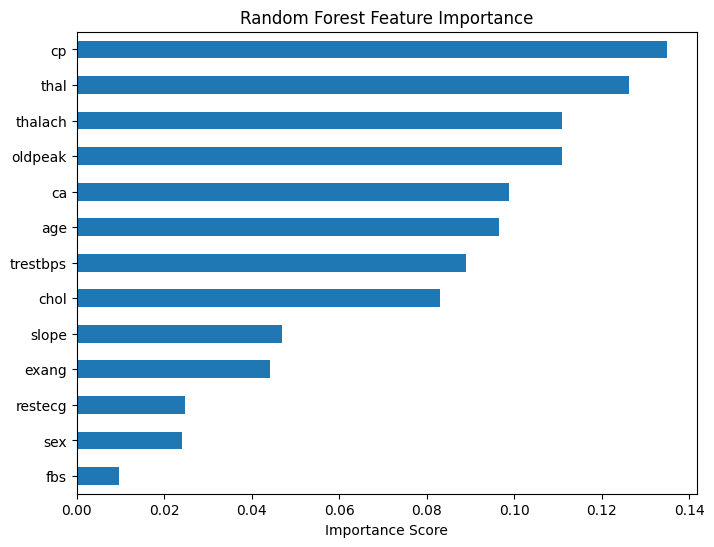

In [17]:
import matplotlib.pyplot as plt

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=True)

importances.plot(kind="barh", figsize=(8,6))
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()


# Insight
Chest pain type, ST depression, and maximum heart rate were among the most influential predictors, consistent with earlier statistical findings.

7. Model Comparison Summary

In [20]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

comparison
# Heart Disease Prediction Analysis Script

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.853333,0.947143
1,Random Forest,0.853333,0.937857


# Conclusion:
While Logistic Regression offers interpretability, Random Forest achieved superior predictive performance, capturing nonlinear relationships between clinical features and heart disease.

# 8. ROC Curve

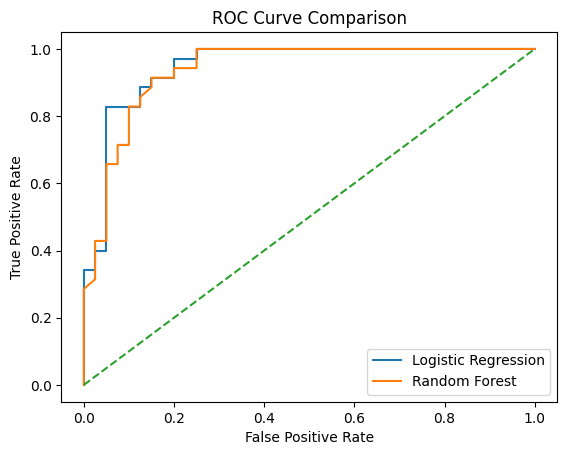

In [21]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
